In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pygsp
from tqdm import tqdm
import torch
from torch import optim
import spectral_denoiser as sd

# Load Image and Create Graph

In [2]:
N = 100
noodle = Image.open("noodle.jpg").resize((N,N))
noodle_array = np.asarray(noodle)
noodle_cropped = noodle_array
G = pygsp.graphs.Grid2d(N)

# Create an Instance

In [3]:
denoiser = sd.Spectral_Denoiser(G)

# Gaussian Noise

In [4]:
noodle_gray = np.mean(noodle_cropped, axis = 2)
f_tilde = noodle_gray.reshape(-1) + 50*np.random.randn(N*N)

2022-11-29 18:58:29,801:[WARNING](pygsp.graphs.graph.lmax): The largest eigenvalue G.lmax is not available, we need to estimate it. Explicitly call G.estimate_lmax() or G.compute_fourier_basis() once beforehand to suppress the warning.


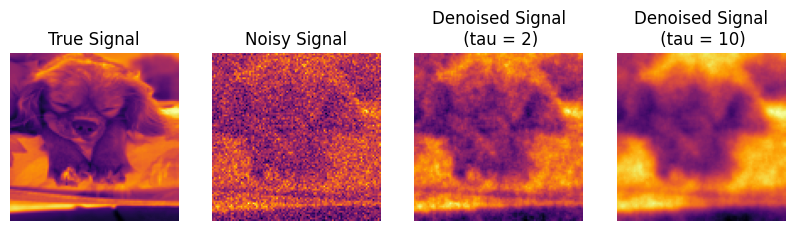

In [5]:
fig, ax = plt.subplots(1,4,figsize=(10,40))
ax[0].imshow(noodle_gray.reshape(N,N), cmap = 'inferno')
ax[0].set_title("True Signal")
ax[0].axis("off")

ax[1].imshow(f_tilde.reshape(N,N), cmap = 'inferno')
ax[1].set_title("Noisy Signal")
ax[1].axis("off")

f_check = denoiser.remove_gaussian_noise(f_tilde,tau=2)
ax[2].imshow(f_check.reshape(N,N), cmap = 'inferno')
ax[2].set_title("Denoised Signal\n (tau = 2)")
ax[2].axis("off")

f_check = denoiser.remove_gaussian_noise(f_tilde,tau=10)
ax[3].imshow(f_check.reshape(N,N), cmap = 'inferno')
ax[3].set_title("Denoised Signal\n (tau = 10)")
ax[3].axis("off")
plt.show()

# Bernoulli Noise

In [6]:
z = 1*(np.random.randn(N,N) > 1)
noodle_gray = np.mean(noodle_cropped, axis = 2)
f_tilde = z*noodle_gray

In [7]:
denoised = denoiser.remove_bernoulli_noise(f_tilde)

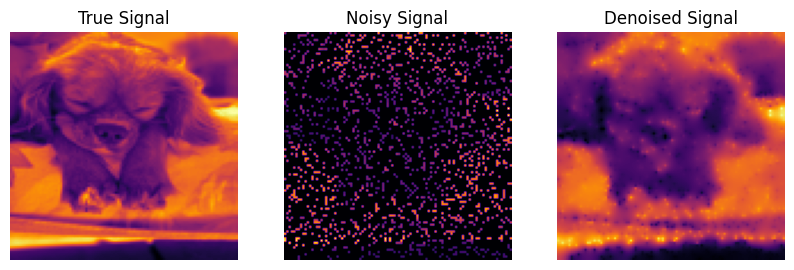

In [8]:
fig, ax = plt.subplots(1,3,figsize=(10,30))
ax[0].imshow(noodle_gray.reshape(N,N), cmap = 'inferno')
ax[0].set_title("True Signal")
ax[0].axis("off")

ax[1].imshow(f_tilde, cmap = 'inferno')
ax[1].set_title("Noisy Signal")
ax[1].axis("off")

ax[2].imshow(denoised.reshape(N,N), cmap = 'inferno')
ax[2].set_title("Denoised Signal")
ax[2].axis("off")
plt.show()

# Uniform Noise

In [9]:
f_tilde = noodle_gray.reshape(-1) * np.random.uniform(0,1,G.N)

In [10]:
f_check = denoiser.remove_uniform_noise(f_tilde,alpha=1,beta=1,gamma=1, lr = 5, MAX_ITER=1000)

/Users/samuelleone/Documents/GitHub/Spectral-Denoising/spectral_denoiser.py:124: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(signal.clone(), requires_grad = True)
100%|███████████████████████████████████████| 1000/1000 [02:05<00:00,  7.96it/s]


/var/folders/vv/h1bxm3t15sx2m3r40_nzb0sr0000gn/T/ipykernel_7023/3662242174.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


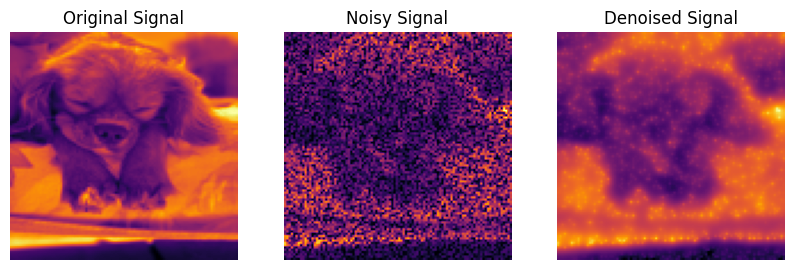

In [11]:
fig, ax = plt.subplots(1,3,figsize=(10,30))
ax[0].imshow(noodle_gray,cmap='inferno')
ax[0].set_title("Original Signal")
ax[1].imshow(f_tilde.reshape(N,N),cmap='inferno')
ax[1].set_title("Noisy Signal")
ax[2].imshow(f_check.reshape(N,N),cmap='inferno')
ax[2].set_title("Denoised Signal")
ax[0].axis("off"); ax[1].axis("off"); ax[2].axis("off");
fig.show()